In [41]:
import numpy as np
import pandas as pd
import warnings
from datetime import datetime, timedelta
from matplotlib import pyplot as plt


warnings.filterwarnings('ignore')

## Import Data

In [106]:
telescopes = ['12-meter','alma','apex','aste','iram','jcmt','lmt','sma','smt','spt']

In [107]:
starttime = datetime(2019,10,3,6)
endtime = datetime(2019,10,14,0) # not included
timestamps = np.arange(starttime, endtime, 
                       timedelta(hours=6)).astype(datetime)
databook = {}
for ts in telescopes:
    databook[ts] = dict.fromkeys(timestamps)

In [ ]:
for ts in telescopes:
    for t in timestamps:
        filepath = "data/"+ ts +"/"+ t.strftime("%Y%m%d_%H:%M:%S")
        try:
            df = pd.read_csv(filepath, delim_whitespace=True, skiprows = 1, header = None)
            df.columns = ["date", "tau225", "Tb[k]", "pwv[mm]", "lwp[kg*m^-2]","iwp[kg*m^-2]","o3[DU]"]
            df['date'] = pd.to_datetime(df['date'], format = "%Y%m%d_%H:%M:%S")
            databook[ts][t] = df
        except FileNotFoundError:
            databook[ts][t] = None
# databook is a dictionary of dictionaries of dataframes 
# keys: telescope names
# values: dictionaries of dataframes for one telescope
# databook[telescope_name] is a dictionary of dataframes for one telescope
# keys: timestamps when the forecast is made
# values: forecast dataframe (None if missing)

All our available data is stored in `databook`(a dict of dictionaries):

`databook` indexing:

`databook[telescope_name][timestamp]` is a dataframe of the 16-day forward forecast made at `timestamp` for `telescope_name`. See example below:

In [113]:
print(telescopes[0],timestamps[1])
(databook[telescopes[0]][timestamps[1]]).head()

12-meter 2019-10-03 12:00:00


,date,tau225,Tb[k],pwv[mm],lwp[kg*m^-2],iwp[kg*m^-2],o3[DU]
0,2019-10-03 12:00:00,0.76472,154.45,12.945,0.000000,0.000000,252.87
1,2019-10-03 13:00:00,0.76153,154.05,12.879,0.000000,0.000000,253.39
2,2019-10-03 14:00:00,0.76019,153.85,12.872,0.000000,0.000000,253.79
3,2019-10-03 15:00:00,0.00000,0.00,0.000,0.000000,0.000000,0.00
4,2019-10-03 16:00:00,0.90973,171.53,15.391,0.006263,0.000001,253.53


## Plot forecast

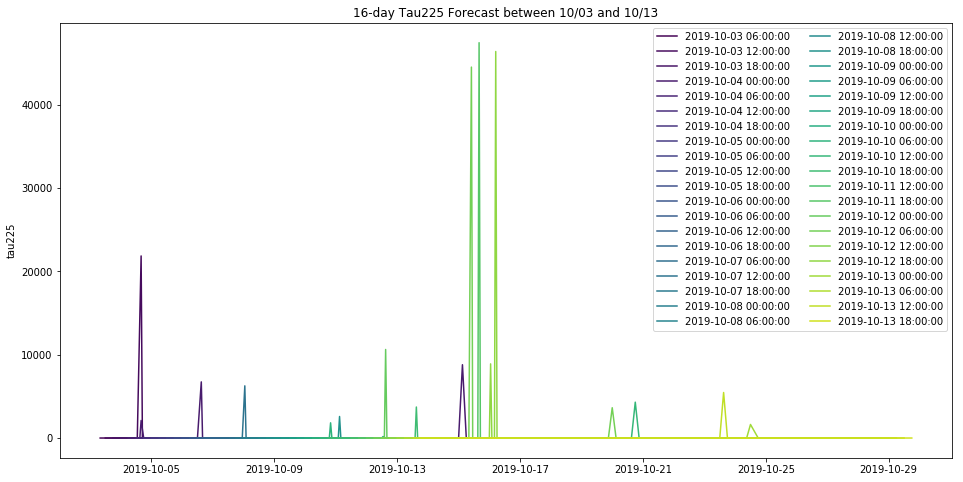

In [103]:
import matplotlib.cm as cm
#cycle through colors from a continuous color map
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,len(timestamps))))

plt.figure(figsize = (16,8))
for t in databook:
    df = databook[t]
    if df is not None:
        plt.plot(df['date'], df['tau225'], label=t)
plt.legend(ncol = 2)
plt.title("16-day Tau225 Forecast between 10/03 and 10/13")
plt.ylabel("tau225")
plt.show()

As we can see, there are some really high spikes. Are these outliers? (need to be validated)

Zoom in a little bit:

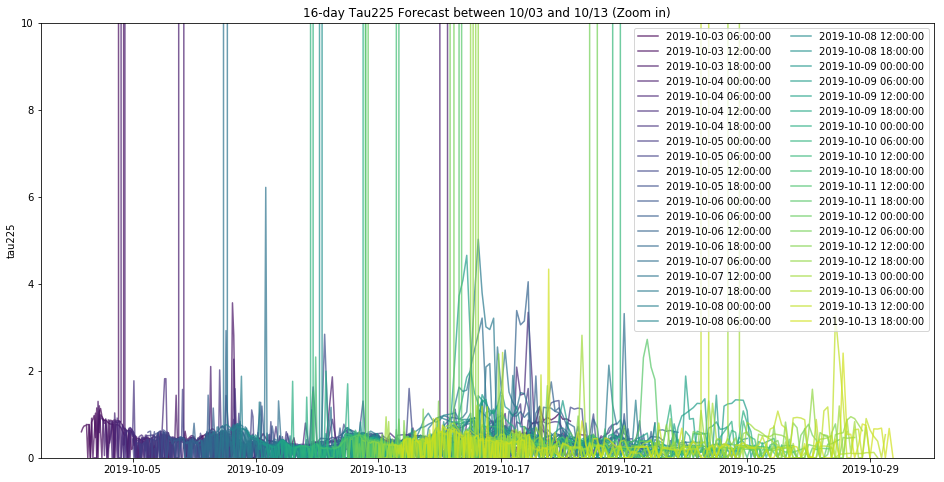

In [105]:
plt.figure(figsize = (16,8))
for t in databook:
    df = databook[t]
    if df is not None:
        plt.plot(df['date'], df['tau225'], label=t, alpha = 0.7)
plt.legend(ncol = 2)
plt.title("16-day Tau225 Forecast between 10/03 and 10/13")
plt.ylabel("tau225")
plt.ylim(0,10)
plt.show()

It seems that the forecast has some variance.

## Compute variance